## ECE-253 Homework 2

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import skimage.morphology as ski_morphy
import scipy.ndimage.measurements as scipy_n_measure
import pandas as pd
from lloyd_python import lloyds

### Problem 1. Adaptive Histogram Equalization

#### How does the original image qualitatively compare to the images after AHE and HE respectively?
 From the figures shown below, the images processed by AHE contain more details than the image processed by HE. Besides, by implementing the smaller window size, the performance of AHE is better which results in more visiable details in the processed image. For example,the people inside the house are able to be seen more clearly under smaller window size. 
    
#### Which strategy (AHE or HE) works best for beach.png and why? Is this true for any image in general?
For 'beach.png', the AHE strategy work better than the HE. One of the most important reason is that this image contain a large portion of "united" pixels of the bright sky, while having another portion of pixels of the dark window of the house, which can result in poor performance of the HE. It is not true that the AHE will always work better than the HE for any image in general.

In [2]:
def AHE(im, win_size):
    w,h= im.shape
    pad_size = int(win_size/2)
    im_pad = np.pad(im,pad_size,mode='symmetric')
    output = np.zeros((w,h))
    for x in range(w):
        for y in range(h):
            rank = 0
            contx_reg = im_pad[x:x+2*pad_size,y:y+2*pad_size]
            rank = np.sum(im[x,y]>contx_reg)
            output[x,y] = int(rank*255/(win_size**2))
    return output

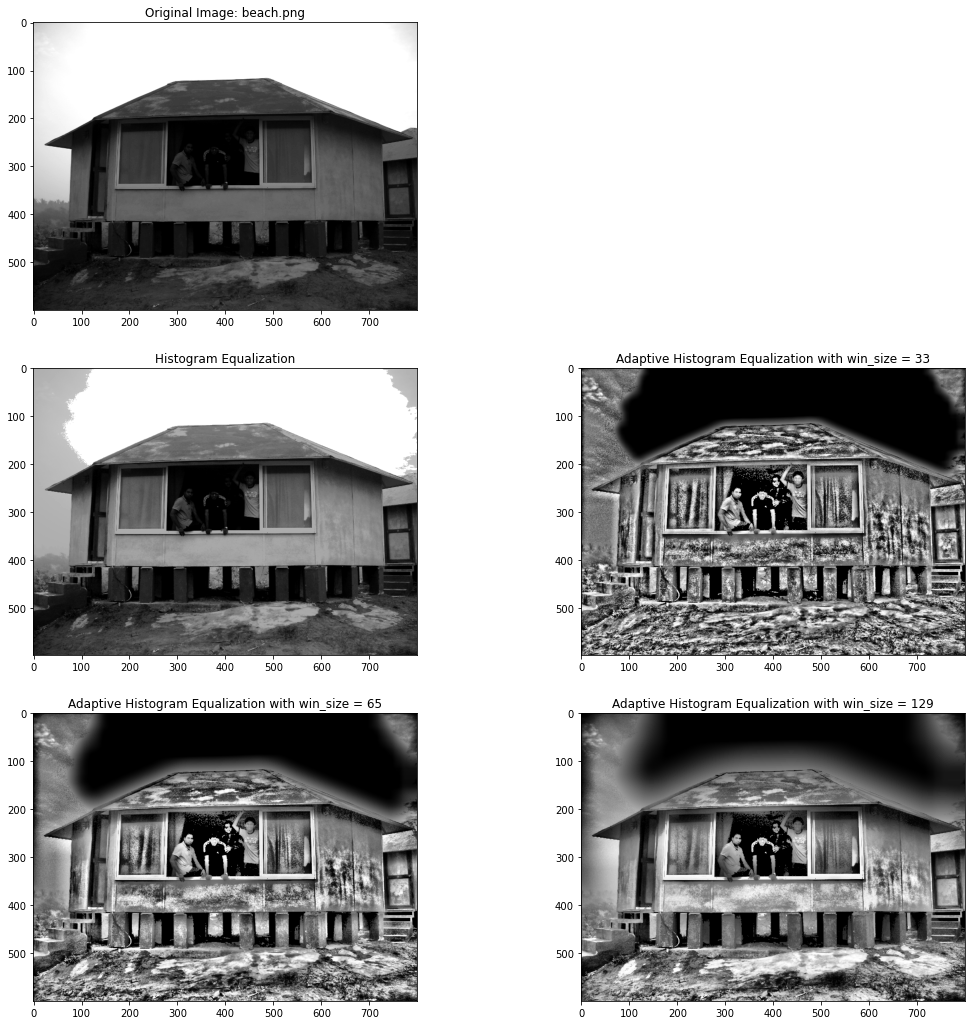

In [3]:
im = cv2.imread('beach.png',0)
win_size = [33,65,129]

im_HE = cv2.equalizeHist(im)

ref = plt.figure(figsize = (18,18))
ax0 = ref.add_subplot(3,2,1)
ax0.title.set_text('Original Image: beach.png')
ax0.imshow(im,cmap='gray')

ax1 = ref.add_subplot(3,2,3)
ax1.title.set_text('Histogram Equalization')
ax1.imshow(im_HE,cmap='gray')

i = 4

for size in win_size:
    im_AHE = AHE(im,size)
    ax = ref.add_subplot(3,2,i)
    i += 1
    ax.title.set_text('Adaptive Histogram Equalization with win_size = %s'%size)
    ax.imshow(im_AHE,cmap='gray')

### Problem 2. Binary Morphology

#### Prat (i)

In [4]:
im2 = cv2.imread('circles_lines.jpg',0)
im2_binary = cv2.threshold(im2, 128, 255, cv2.THRESH_BINARY)[1]
footprint = ski_morphy.disk(4)
im2_open = ski_morphy.opening(im2_binary, footprint)
im2_labeled, num_features = scipy_n_measure.label(im2_open)

In [5]:
print('The Shape of the structuring element:',footprint.shape,'\nThe Type of the structuring element:', footprint.dtype)
footprint

The Shape of the structuring element: (9, 9) 
The Type of the structuring element: uint8


array([[0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 1, 1, 1, 1, 0, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 0, 1, 1, 1, 1, 1, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0]], dtype=uint8)

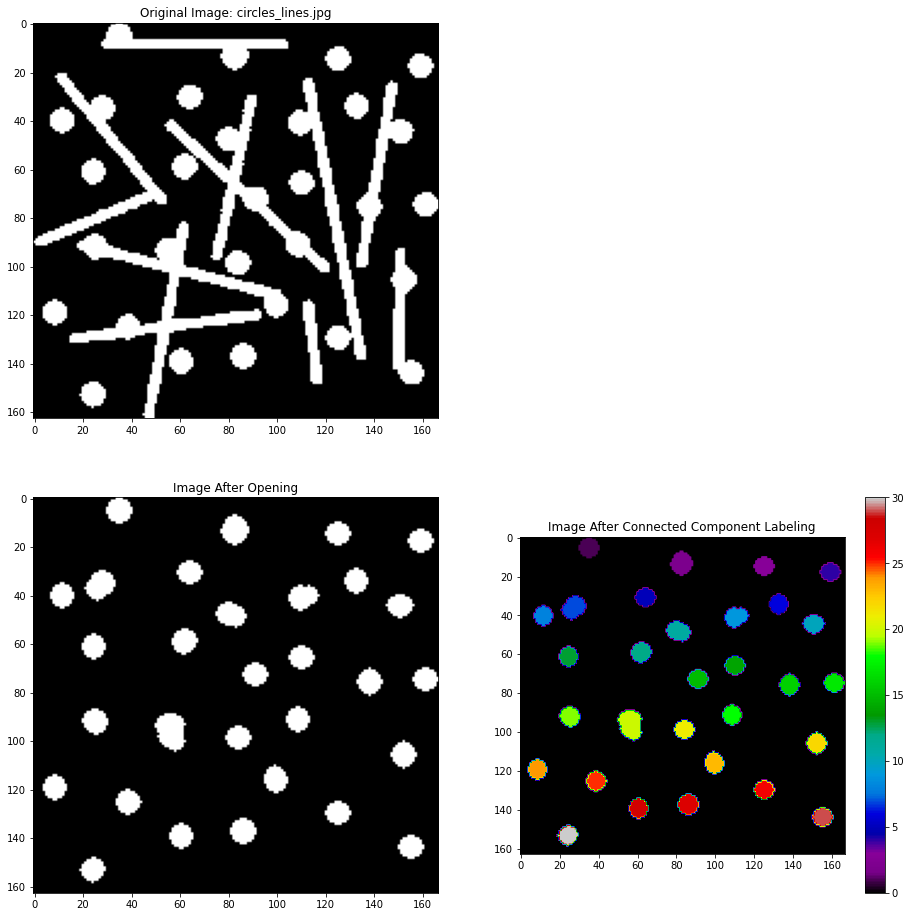

In [6]:
ref = plt.figure(figsize = (16,16))
ax0 = ref.add_subplot(2,2,1)
ax0.title.set_text('Original Image: circles_lines.jpg')
ax0.imshow(im2_binary,cmap='gray')

ax1 = ref.add_subplot(2,2,3)
ax1.title.set_text('Image After Opening')
ax1.imshow(im2_open,cmap='gray')

ax2 = ref.add_subplot(2,2,4)
ax2.title.set_text('Image After Connected Component Labeling')
img_label = ax2.imshow(im2_labeled,cmap='nipy_spectral')
ref.colorbar(img_label,ax=ax2)

In [7]:
labels_1 = []

for i in range(1,num_features+1):
    label = np.where(im2_labeled == i)
    area = len(label[0])
    x = round(np.mean(label[0]),2)
    y = round(np.mean(label[1]),2)
    labels_1.append([i,area,(x,y)])
pd_labels_1 = pd.DataFrame(labels_1,columns=['Feature #','Area','Centroid'])

In [8]:
pd_labels_1

Feature #  Area         Centroid
0           1    89      (5.0, 35.0)
1           2   106   (13.04, 82.59)
2           3    78    (14.5, 125.0)
3           4    78    (17.5, 159.0)
4           5    78     (30.5, 64.0)
5           6    78    (34.0, 132.5)
6           7   109   (35.75, 27.25)
7           8    78     (40.0, 11.5)
8           9    97   (40.7, 110.57)
9          10    80   (44.22, 150.5)
10         11    97    (47.9, 80.99)
11         12    85   (58.85, 61.85)
12         13    78     (61.0, 24.5)
13         14    78    (65.5, 110.0)
14         15    78     (72.5, 91.0)
15         16    84    (75.5, 138.0)
16         17    78    (74.5, 161.0)
17         18    78    (91.0, 108.5)
18         19    85   (91.85, 25.15)
19         20   148   (95.86, 56.32)
20         21    78     (98.5, 84.0)
21         22    84   (105.5, 152.0)
22         23    84  (115.68, 99.37)
23         24    78     (119.0, 8.5)
24         25    81   (125.0, 38.68)
25         26    78   (129.5, 125.0)
26         27    89    (137.0, 86.0)
27         28    78    (139.0, 60.5)
28         29    78   (143.5, 155.0)
29         30    77  (152.83, 24.17)

#### Part (ii)

In [9]:
im3 = cv2.imread('lines.jpg',0)
im3_binary = cv2.threshold(im3, 128, 255, cv2.THRESH_BINARY)[1]
footprint = ski_morphy.rectangle(8,3)
im3_open = ski_morphy.opening(im3_binary, footprint)
im3_labeled, num_features = scipy_n_measure.label(im3_open)

In [10]:
print('The Shape of the structuring element:',footprint.shape,'\nThe Type of the structuring element:', footprint.dtype)
footprint

The Shape of the structuring element: (8, 3) 
The Type of the structuring element: uint8


array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]], dtype=uint8)

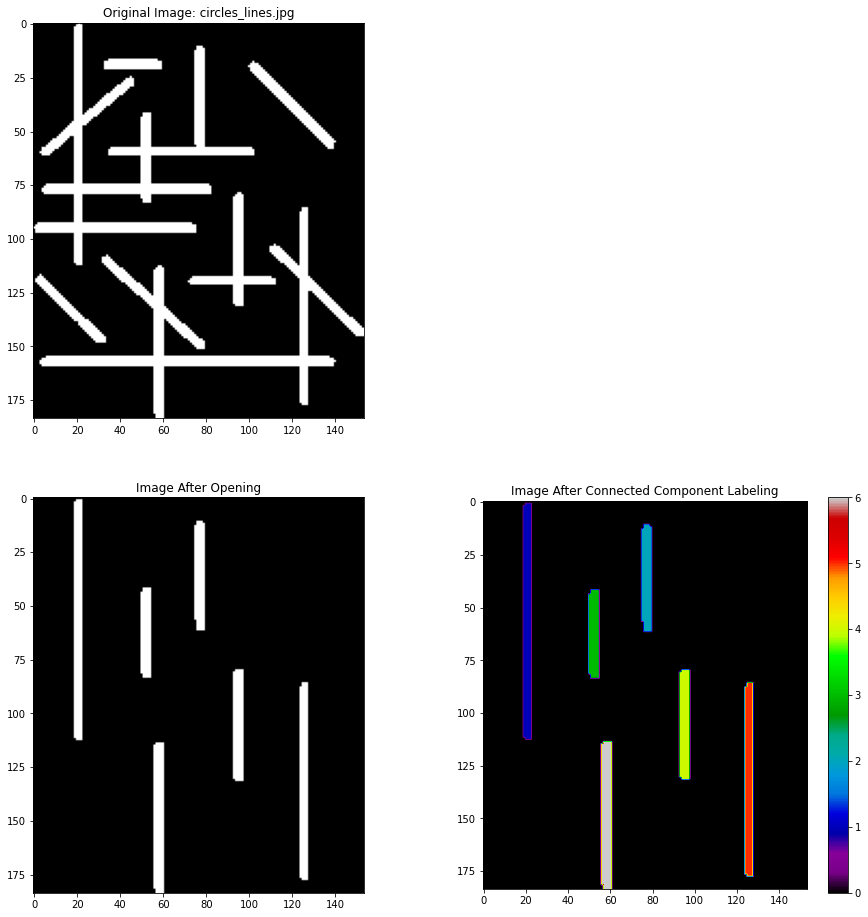

In [11]:
ref = plt.figure(figsize = (16,16))
ax0 = ref.add_subplot(2,2,1)
ax0.title.set_text('Original Image: circles_lines.jpg')
ax0.imshow(im3_binary,cmap='gray')

ax1 = ref.add_subplot(2,2,3)
ax1.title.set_text('Image After Opening')
ax1.imshow(im3_open,cmap='gray')

ax2 = ref.add_subplot(2,2,4)
ax2.title.set_text('Image After Connected Component Labeling')
img_label = ax2.imshow(im3_labeled,cmap='nipy_spectral')
ref.colorbar(img_label,ax=ax2)

In [12]:
labels_2 = []

for i in range(1,num_features+1):
    label = np.where(im3_labeled == i)
    x_len = max(label[0]) - min(label[0])
    y_len = max(label[1]) - min(label[1])
    length = max(x_len,y_len)
    x = round(np.mean(label[0]),2)
    y = round(np.mean(label[1]),2)
    labels_2.append([i,length,(x,y)])
pd_labels_2 = pd.DataFrame(labels_2,columns=['Feature #','Length','Centroid'])

In [13]:
pd_labels_2

Feature #  Length          Centroid
0          1     111     (56.5, 20.51)
1          2      50    (35.83, 77.05)
2          3      41     (62.5, 52.04)
3          4      51    (105.5, 95.02)
4          5      91  (131.62, 125.51)
5          6      69    (148.4, 58.02)

### Problem 3. Lloyd-Max Quantizer

#### Part (i)

In [61]:
def uni_quant(im,s):
    # uniform quantization: Q(f) = [(f-f_min)/q]*q +q/2+f_min
    # q = (f_max-f_min)/2**s
    
    assert s >= 1 and s <= 7, 'invalid scalar s'
    
    q = int(256/(2**s))
    im_uni = (np.floor(im/q)*q +q/2).astype(int)
    return im_uni

#### Part (ii)

In [96]:
def lloyds_quant(im,s):
    M,N = im.shape
    training_set = np.reshape(im,(M*N,1))
    initcodebook = [2**s]
    partition, codebook = lloyds(training_set, initcodebook)
    im_lloyds = codebook[np.searchsorted(partition,im)].astype(int)
    return im_lloyds

In [104]:
def MSE(im,im_quant):
    return np.mean((im-im_quant)**2)

In [124]:
lena = cv2.imread('lena512.tif',0)
diver = cv2.imread('diver.tif',0)

lena_uni = np.zeros((7,lena.shape[0],lena.shape[1]))
lena_uni_MSE = np.zeros(7)

lena_lloyds = np.zeros((7,lena.shape[0],lena.shape[1]))
lena_lloyds_MSE = np.zeros(7)

diver_uni = np.zeros((7,diver.shape[0],diver.shape[1]))
diver_uni_MSE = np.zeros(7)

diver_lloyds = np.zeros((7,diver.shape[0],diver.shape[1]))
diver_lloyds_MSE = np.zeros(7)

for i in range(7):
    lena_uni[i] = uni_quant(lena,i+1)
    lena_uni_MSE[i] = MSE(lena,lena_uni[i])
    
    lena_lloyds[i] = lloyds_quant(lena,i+1)
    lena_lloyds_MSE[i] = MSE(lena,lena_lloyds[i])
    
    diver_uni[i] = uni_quant(diver,i+1)
    diver_uni_MSE[i] = MSE(diver,diver_uni[i])
    
    diver_lloyds[i] = lloyds_quant(diver,i+1)
    diver_lloyds_MSE[i] = MSE(diver,diver_lloyds[i])

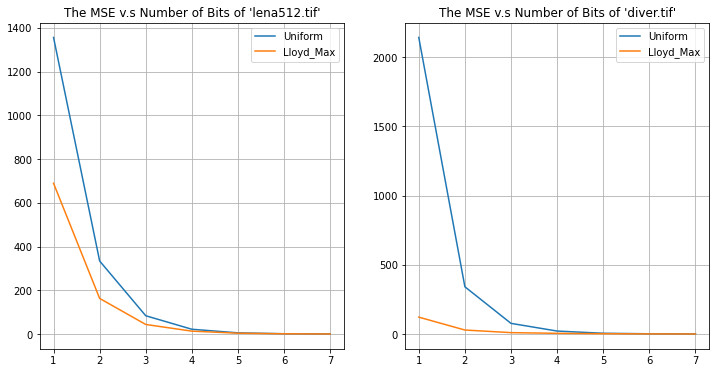

In [295]:
ref = plt.figure(figsize = (12,6))
ax0 = ref.add_subplot(1,2,1)
ax0.plot(range(1,8),lena_uni_MSE,label= 'Uniform')
ax0.plot(range(1,8),lena_lloyds_MSE,label='Lloyd_Max')
ax0.title.set_text('The MSE v.s Number of Bits of \'lena512.tif\'')
ax0.legend()
ax0.grid(True)

ax1 = ref.add_subplot(1,2,2)
ax1.plot(range(1,8),diver_uni_MSE,label= 'Uniform')
ax1.plot(range(1,8),diver_lloyds_MSE,label='Lloyd_Max')
ax1.title.set_text('The MSE v.s Number of Bits of \'diver.tif\'')
ax1.legend()
ax1.grid(True)

#### Compare the results for the different quantizers/images and explain them. That is, why does one quantizer outperform the other, and why is the performance gap larger for one image than for the other?

For both two images,by comparing the MSE of two quantizers,the Lloyd-Max quantizer outperforms the uniform quantizer. The main reason of it is that the Lloyd-Max is optimal in the square error sense. Besides,it can be seend that the MSE of both quantizers decreases as the number of bits increases.
    
On the other hand, the performance gap of the image 'lena512.tif' is smaller than that of the image 'diver.tif'. Compare to the images by the two quantizers from 1 bit to 7 bits, it can be seen that the images 'lena512.tif' are all fine to observe the details of the woman no matter what the quantizer we used and how many bits of it, while the diver with the 1-bit and 2-bit uniform quantization is hard to be seen than the one shown in the Lloyds-Max Quantization.  

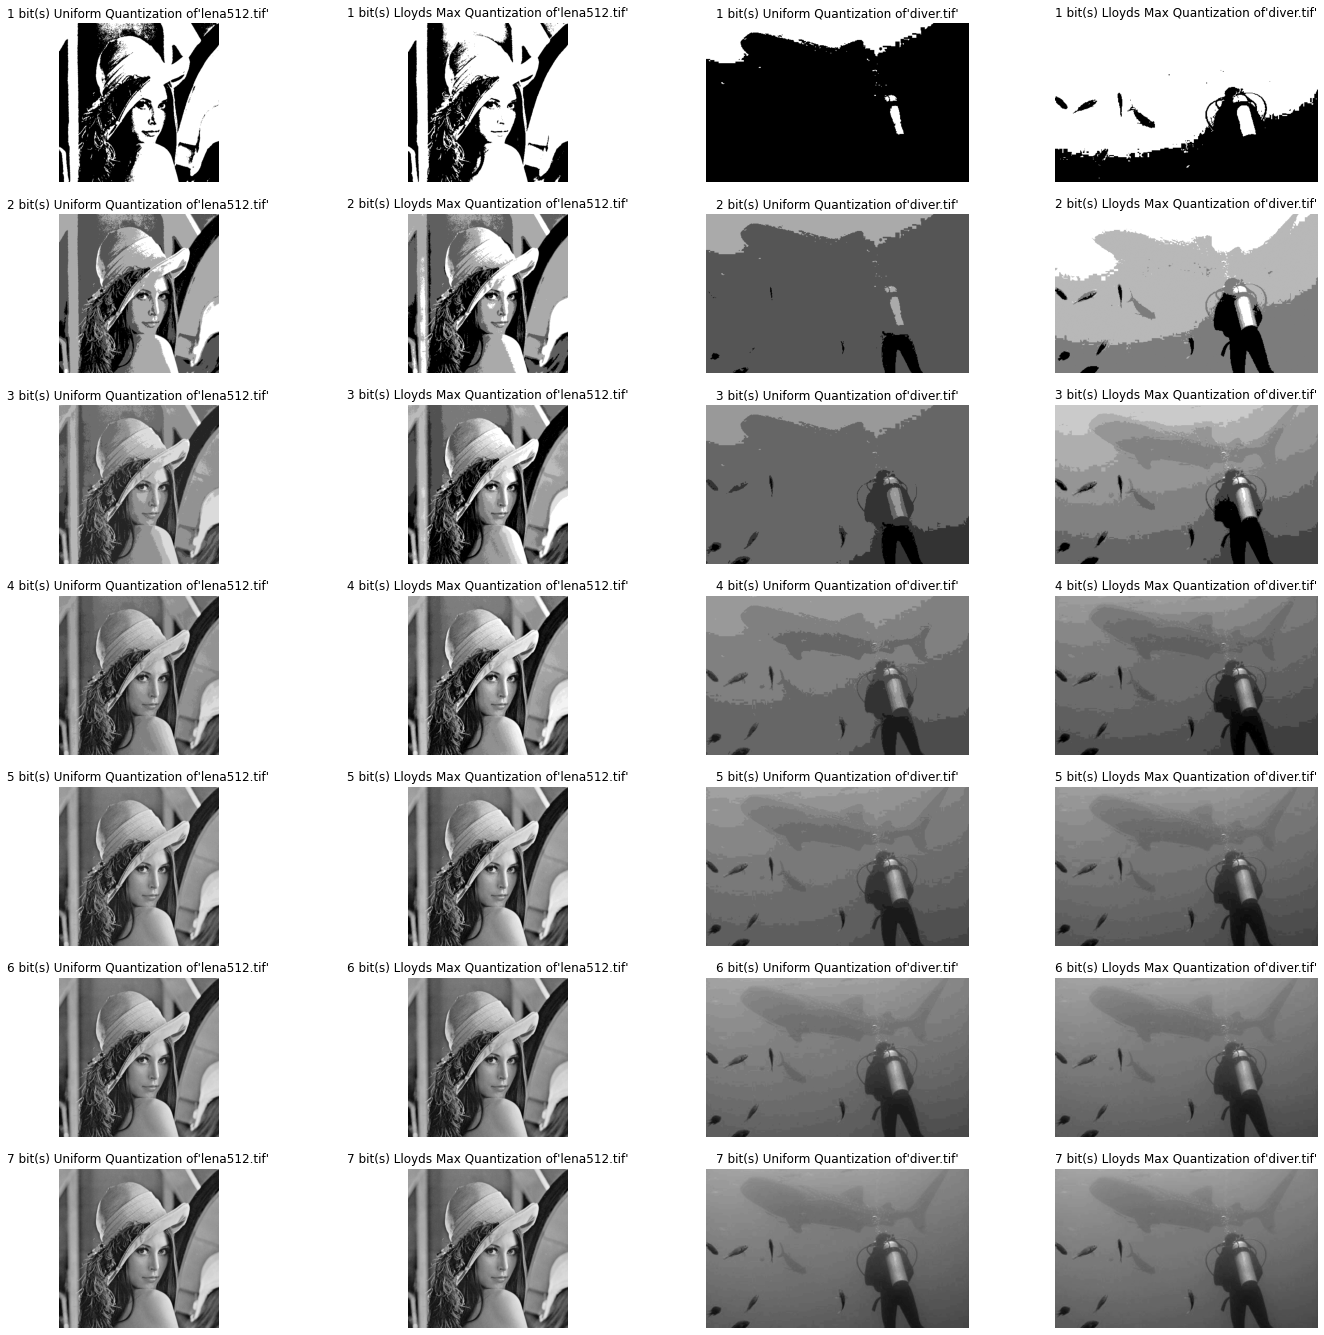

In [190]:
fig,axs = plt.subplots(7,4,figsize=[24,24])
for i in range(7):
    axs[i,0].imshow(lena_uni[i],cmap='gray') 
    axs[i,0].set_title('%s bit(s) Uniform Quantization of\'lena512.tif\'' %(i+1))
    axs[i,0].axis('off')
    axs[i,1].imshow(lena_lloyds[i],cmap='gray') 
    axs[i,1].set_title('%s bit(s) Lloyds Max Quantization of\'lena512.tif\'' %(i+1))
    axs[i,1].axis('off')
    
    axs[i,2].imshow(diver_uni[i],cmap='gray')
    axs[i,2].set_title('%s bit(s) Uniform Quantization of\'diver.tif\'' %(i+1))
    axs[i,2].axis('off')
    axs[i,3].imshow(diver_lloyds[i],cmap='gray')
    axs[i,3].set_title('%s bit(s) Lloyds Max Quantization of\'diver.tif\'' %(i+1))
    axs[i,3].axis('off')

#### Part (iii)

In [176]:
lena_HE = cv2.equalizeHist(lena)
diver_HE = cv2.equalizeHist(diver)

lena_HE_uni = np.zeros((7,lena_HE.shape[0],lena_HE.shape[1]))
lena_HE_uni_MSE = np.zeros(7)

lena_HE_lloyds = np.zeros((7,lena_HE.shape[0],lena_HE.shape[1]))
lena_HE_lloyds_MSE = np.zeros(7)

diver_HE_uni = np.zeros((7,diver_HE.shape[0],diver_HE.shape[1]))
diver_HE_uni_MSE = np.zeros(7)

diver_HE_lloyds = np.zeros((7,diver_HE.shape[0],diver_HE.shape[1]))
diver_HE_lloyds_MSE = np.zeros(7)

for i in range(7):
    lena_HE_uni[i] = uni_quant(lena_HE,i+1)
    lena_HE_uni_MSE[i] = MSE(lena_HE,lena_HE_uni[i])
    
    lena_HE_lloyds[i] = lloyds_quant(lena_HE,i+1)
    lena_HE_lloyds_MSE[i] = MSE(lena_HE,lena_HE_lloyds[i])
    
    diver_HE_uni[i] = uni_quant(diver_HE,i+1)
    diver_HE_uni_MSE[i] = MSE(diver_HE,diver_HE_uni[i])
    
    diver_HE_lloyds[i] = lloyds_quant(diver_HE,i+1)
    diver_HE_lloyds_MSE[i] = MSE(diver_HE,diver_HE_lloyds[i])

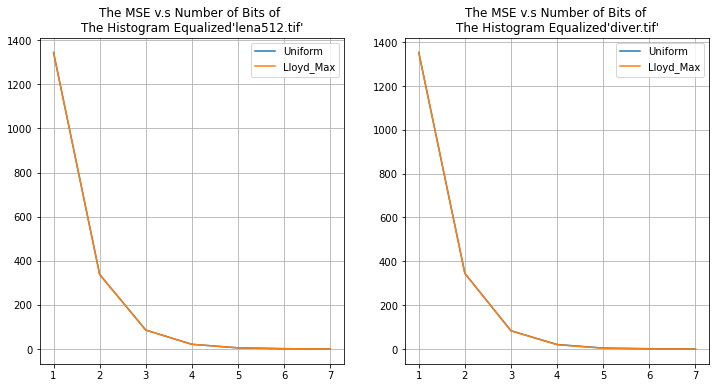

In [296]:
ref = plt.figure(figsize = (12,6))
ax0 = ref.add_subplot(1,2,1)
ax0.plot(range(1,8),lena_HE_uni_MSE,label= 'Uniform')
ax0.plot(range(1,8),lena_HE_lloyds_MSE,label='Lloyd_Max')
ax0.title.set_text('The MSE v.s Number of Bits of \nThe Histogram Equalized\'lena512.tif\'')
ax0.legend()
ax0.grid(True)

ax1 = ref.add_subplot(1,2,2)
ax1.plot(range(1,8),diver_HE_uni_MSE,label= 'Uniform')
ax1.plot(range(1,8),diver_HE_lloyds_MSE,label='Lloyd_Max')
ax1.title.set_text('The MSE v.s Number of Bits of \nThe Histogram Equalized\'diver.tif\'')
ax1.legend()
ax1.grid(True)

#### Compare them with the previous set of plots. What has happened to the gap in MSE between the two quantization approaches and why?

From the plots shown above, it can be seen that the MSE of two quantizers are overlapped with each other in both two images, which results in no performance gap between each other. The reason of it is that the images are globally histogram equalized before implementing quantization.

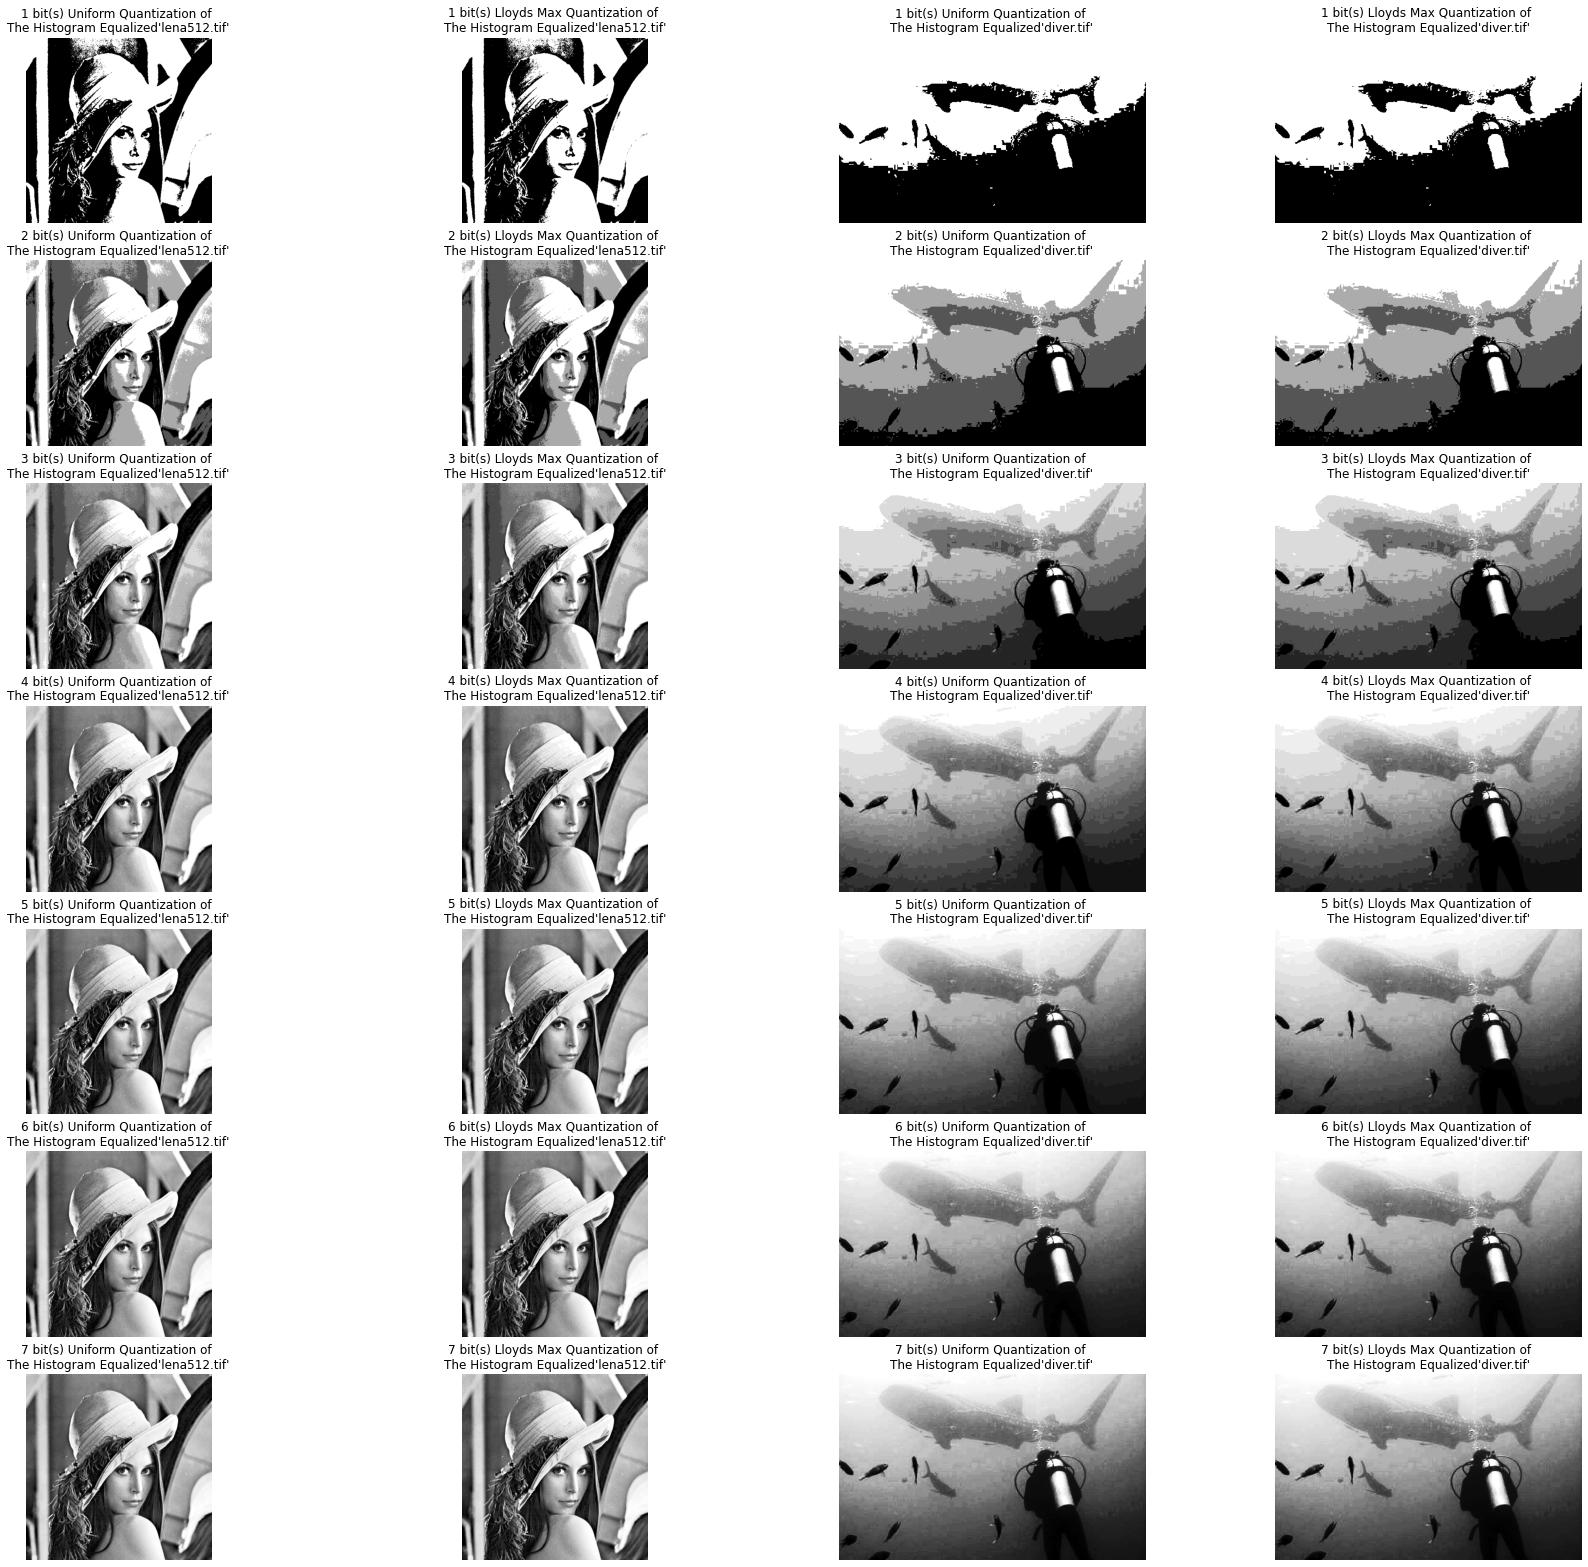

In [189]:
fig,axs = plt.subplots(7,4,figsize=[30,28])
for i in range(7):
    axs[i,0].imshow(lena_HE_uni[i],cmap='gray') 
    axs[i,0].set_title('%s bit(s) Uniform Quantization of \nThe Histogram Equalized\'lena512.tif\'' %(i+1))
    axs[i,0].axis('off')
    axs[i,1].imshow(lena_HE_lloyds[i],cmap='gray') 
    axs[i,1].set_title('%s bit(s) Lloyds Max Quantization of \nThe Histogram Equalized\'lena512.tif\'' %(i+1))
    axs[i,1].axis('off')
    
    axs[i,2].imshow(diver_HE_uni[i],cmap='gray')
    axs[i,2].set_title('%s bit(s) Uniform Quantization of \nThe Histogram Equalized\'diver.tif\'' %(i+1))
    axs[i,2].axis('off')
    axs[i,3].imshow(diver_HE_lloyds[i],cmap='gray')
    axs[i,3].set_title('%s bit(s) Lloyds Max Quantization of \nThe Histogram Equalized\'diver.tif\'' %(i+1))
    axs[i,3].axis('off')


#### Part (iv)

#### Why is the MSE of the 7-bit Lloyd-Max quantizer zero or near zero for the equalized images?
For 7-bit quantizer, the number of gray level is 128, which is close to the actual number of gray level of the image.Meanwhile, the Lloyds-Max is the optimal quantizer in the square error sense. Therefore, with the two conditions, the MSE of the 7-bit Lloyd-Max quantizer is near 0 for the equalized image.

#### One might have thought that equalization is not to the advantage of the Lloyd-Max quantizer, because equalizing the histogram should be attening the distribution, making it more uniform, which should be to the advantage of the uniform quantizer. Explain this phenomenon.

Doing the global histogram equalization before implementing quantization makes the partition and codebook obtained from the Lloyd-Max quantizer become uniform which is similar to what the uniform quantizer does.It is more clear to see from difference of the partitions and codebooks of the Lloyd-Max quantization obtained from the original and the globally histogram euqalizaed image shown below. 

In [303]:
partition, codebook = lloyds(np.reshape(lena,(lena.shape[0]*lena.shape[1],1)), [2**3])

In [304]:
print('Partition: %s' %partition)
print('Codebook: %s' %codebook)

Partition: [ 59.88930608  85.86350167 111.69461508 135.40414857 156.0647811
 177.06530008 198.25780103]
Codebook: [ 47.01851344  72.76009871  98.96690462 124.42232554 146.38597159
 165.7435906  188.38700955 208.12859251]


In [305]:
partition, codebook = lloyds(np.reshape(lena_HE,(lena_HE.shape[0]*lena_HE.shape[1],1)), [2**3])

In [306]:
print('Partition: %s' %partition)
print('Codebook: %s' %codebook)

Partition: [ 31.9005682   63.43194151  95.2816139  126.99819615 159.16176636
 191.51295768 223.44082415]
Codebook: [ 16.41369615  47.38744024  79.47644279 111.08678501 142.9096073
 175.41392542 207.61198993 239.26965837]


### Problem 4. Quantization with Dithering

In [234]:
def uni_quant_10(im):
    # uniform quantization: Q(f) = [(f-f_min)/q]*q +q/2+f_min
    # q = (f_max-f_min)/2**s
    
    im_uni = (np.floor(im/255*10)*(255/10)).astype(int)
    return im_uni

In [273]:
def find_closest_palette_color(pixel):
    return (np.floor(pixel/255*10)*(255/10))

def FSD(im):
    
    w,h,cb = im.shape
    im_FSD = np.pad(np.copy(im),((1,1),(1,1),(0,0)), 'symmetric').astype(float)
    
    for i in range(w+1):
        for j in range(h+1):
            old_pixel = np.copy(im_FSD[i,j])
            new_pixel = find_closest_palette_color(old_pixel)
            im_FSD[i,j] = new_pixel
            quant_error = old_pixel - new_pixel
            im_FSD[i+1,j] += quant_error*7/16 
            im_FSD[i-1,j-1] += quant_error*3/16
            im_FSD[i,j+1] += quant_error*5/16
            im_FSD[i+1,j+1] += quant_error*1/16
    im_FSD = np.where(im_FSD>255,255,im_FSD)       
    return im_FSD.astype(int)

In [292]:
im = cv2.imread('geisel.jpg')
im_uni_10 = uni_quant_10(im)

In [274]:
im_FSD = FSD(im)

Text(0.5, 1.0, 'Floyd-Steinberg')

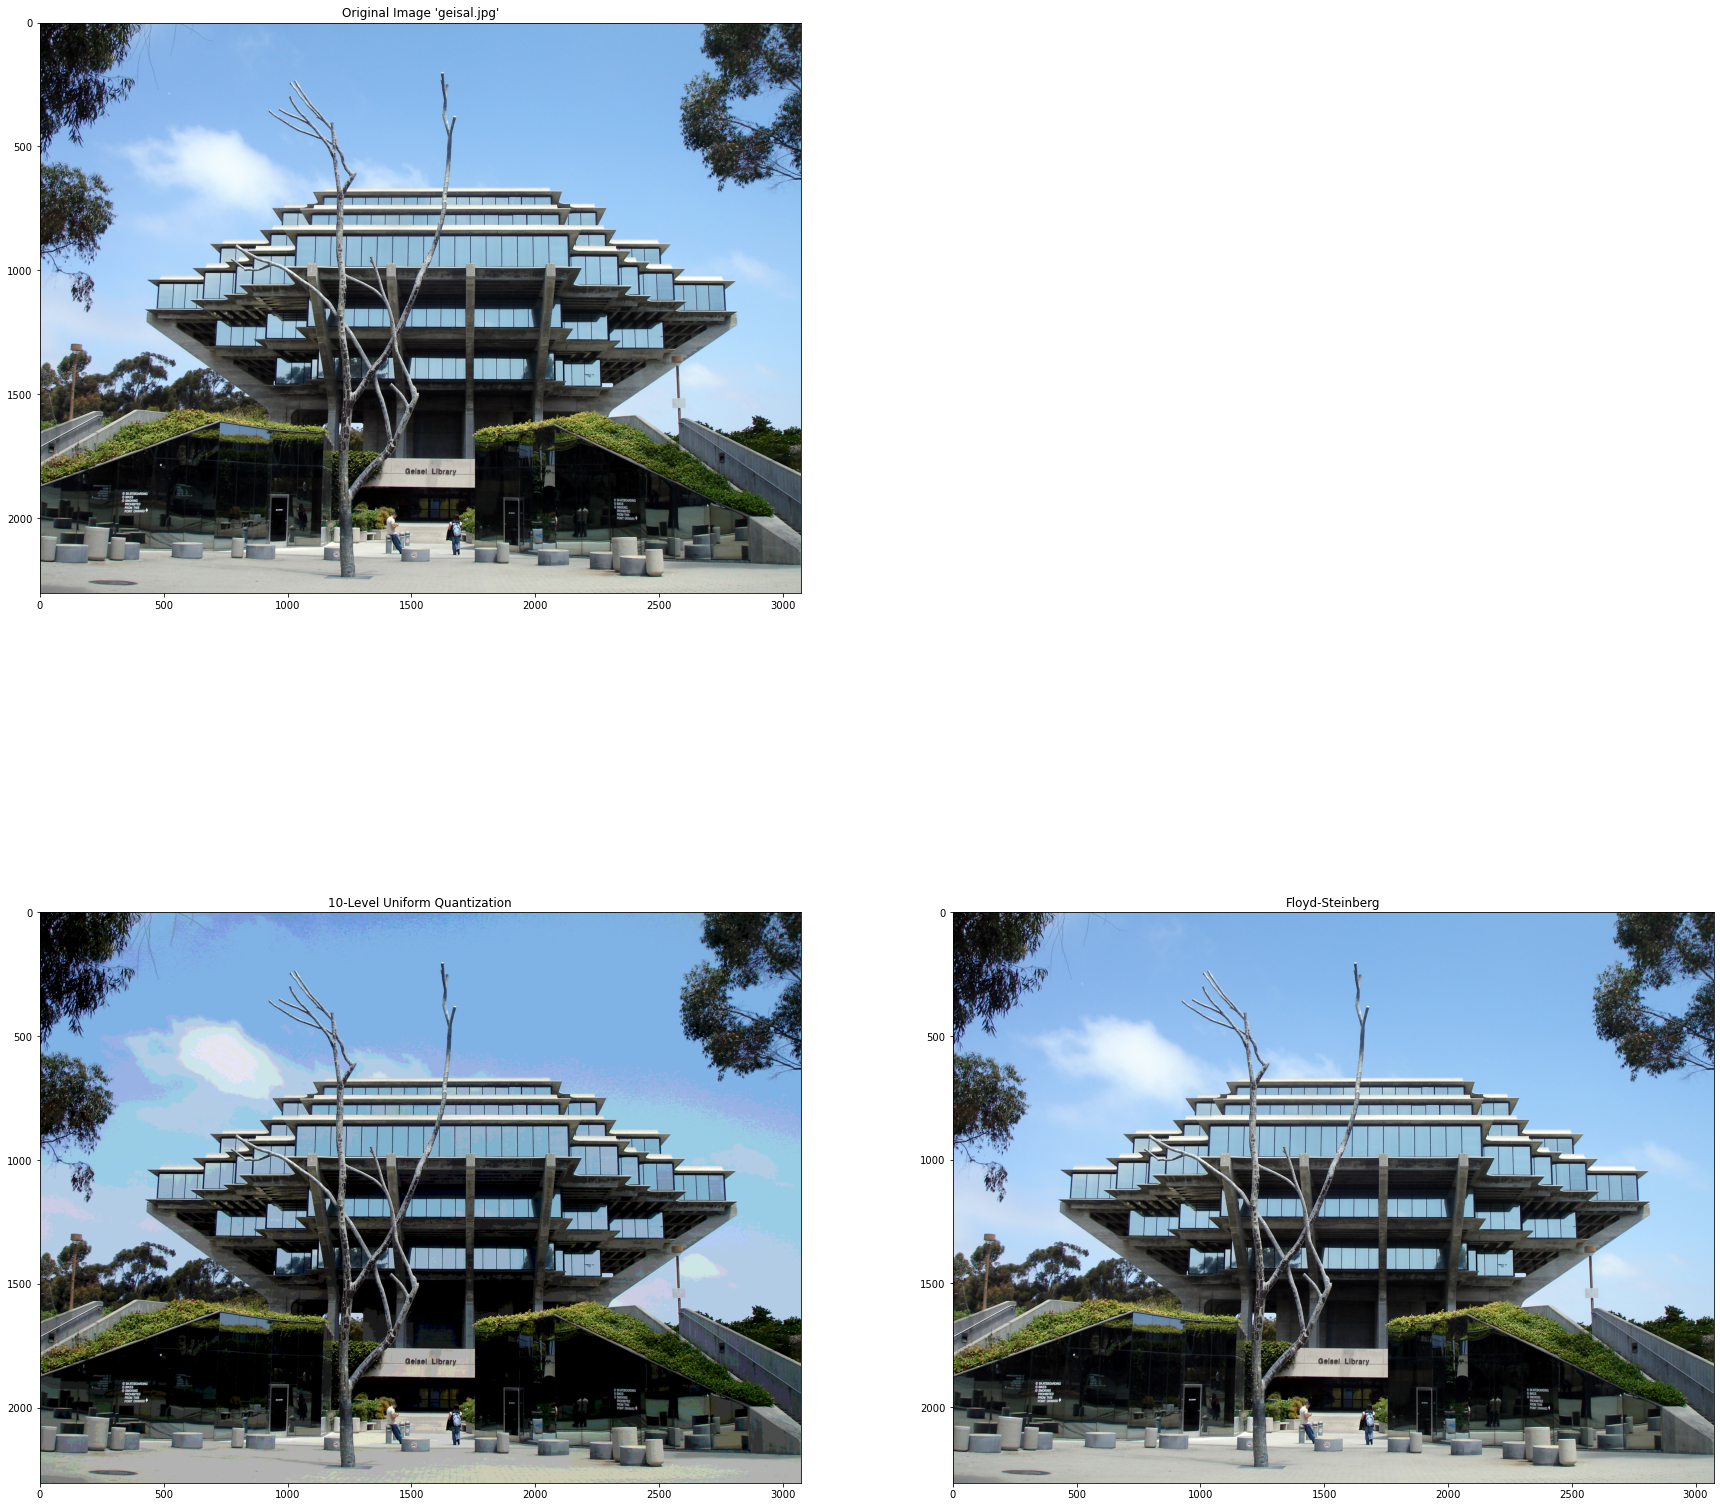

In [294]:
plt.figure(figsize=(30,30))
plt.subplot(2,2,1)
plt.imshow(im[:,:,::-1])
plt.title('Original Image \'geisal.jpg\'')
plt.subplot(2,2,3)
plt.imshow(im_uni_10[:,:,::-1])
plt.title('10-Level Uniform Quantization')

plt.subplot(2,2,4)
plt.imshow(im_FSD[:,:,::-1])
plt.title('Floyd-Steinberg')

Text(0.5, 1.0, 'Floyd-Steinberg')

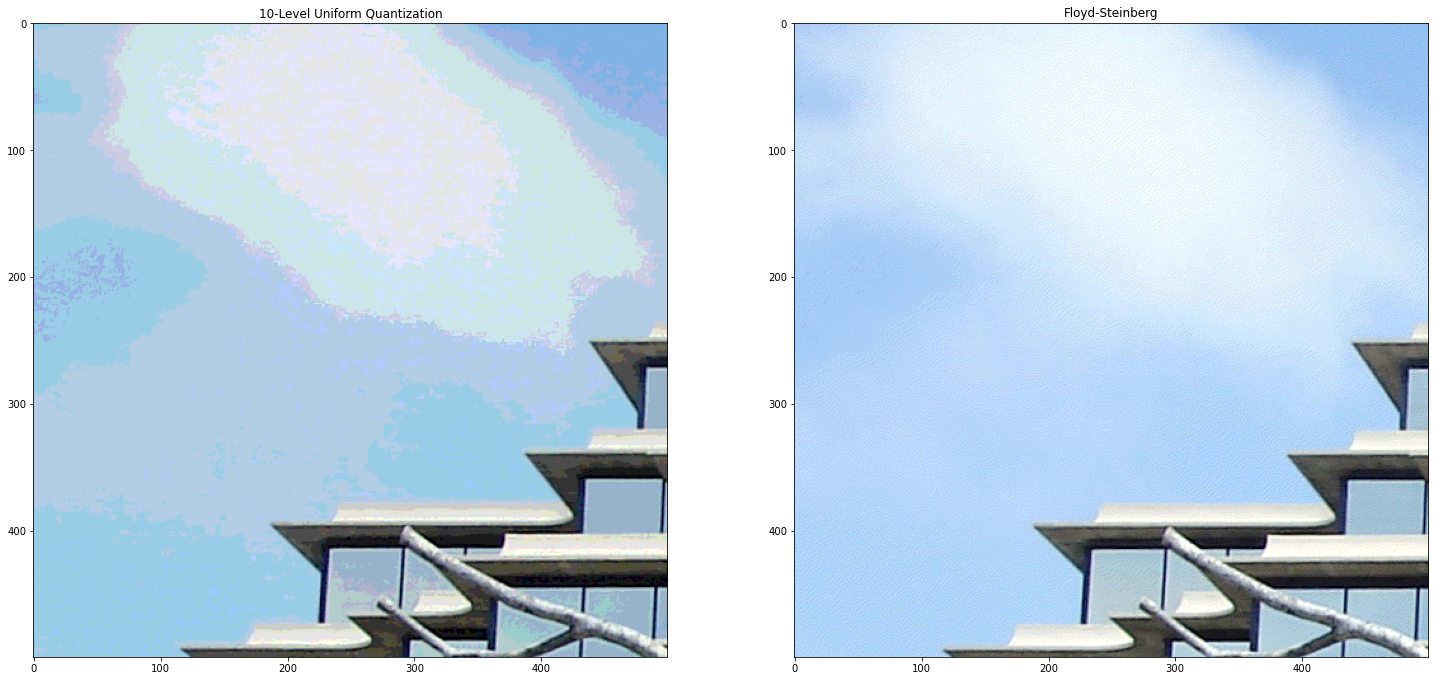

In [313]:
plt.figure(figsize=(25,25))
plt.subplot(1,2,1)
plt.imshow(im_uni_10[500:1000,500:1000,::-1])
plt.title('10-Level Uniform Quantization')
plt.subplot(1,2,2)
plt.imshow(im_FSD[500:1000,500:1000,::-1])
plt.title('Floyd-Steinberg')

#### 1. What differences do you see between the two images?
From the images of two strategies shown above, we can see that the 'FSD' makes the image look smoother than the performance of the 10-level uniform quantization. Especially, when we focus on the clouds shown on the image, there are several rings of colors with different sizes overlapping with each other under condition of the uniform quantization, which makes the image look unreal.   

#### 2. Can you explain what caused these differences?
In the 'FSD' strategy, expect for implementing the 10-level uniform quantization, we are also adding some specific weighted quantization errors of a pixel,which acts like 'noise', to the other pixels around it.By adding these 'noise' to pixels, the banding effct of color due to quantization reduces making the image 'smoother' visablly. 